Task 1: To build a convolutional neural network (CNN) to classify images from the CIFAR-10 dataset.
- Preprocessing Images : Try to enhance the quality of the images using image enhancement techniques 
- Training & Testing : The CIFAR-10 dataset contains 60,000 32x32 color images in 10 classes, with 6,000 images per class. Divide the dataset into training, validation, and test sets. Implement data augmentation to improve model performance.
- Evaluation : Infer the role of preprocessing on these images. Report accuracy on the test set with and without preprocessing. Also, provide confusion matrices to understand misclassifications.

### Importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix

### Loading Data

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


### Data Pre-Processing

In [3]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [4]:
y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)

### Model Building

In [5]:
INPUT_SHAPE = (32, 32, 3)
KERNEL_SIZE = (3, 3)
model = Sequential()

# Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
# Pooling layer
model.add(MaxPool2D(pool_size=(2, 2)))
# Dropout layers
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
# model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

METRICS = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=METRICS)

In [6]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

### Data Augmentation and Training

In [7]:
batch_size = 32
data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(X_train, y_cat_train, batch_size)
steps_per_epoch = X_train.shape[0] // batch_size

r = model.fit(train_generator,
              epochs=2,
              steps_per_epoch=steps_per_epoch,
              validation_data=(X_test, y_cat_test)
             )

Epoch 1/2
1562/1562 [==============================] - 362s 230ms/step - loss: 1.6408 - accuracy: 0.4017 - precision: 0.6138 - recall: 0.1824 - val_loss: 1.3199 - val_accuracy: 0.5316 - val_precision: 0.7169 - val_recall: 0.3571
Epoch 2/2
1562/1562 [==============================] - 357s 228ms/step - loss: 1.2474 - accuracy: 0.5552 - precision: 0.7179 - recall: 0.3888 - val_loss: 1.0701 - val_accuracy: 0.6247 - val_precision: 0.7321 - val_recall: 0.5293


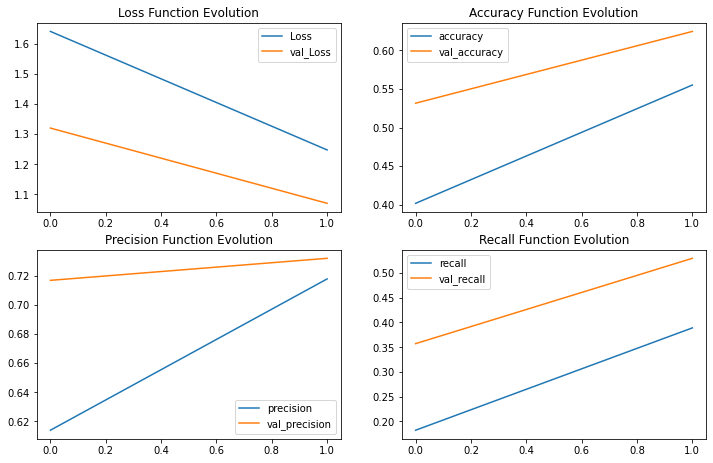

In [8]:
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='val_Loss')
plt.title('Loss Function Evolution')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Function Evolution')
plt.legend()

plt.subplot(4, 2, 3)
plt.plot(r.history['precision'], label='precision')
plt.plot(r.history['val_precision'], label='val_precision')
plt.title('Precision Function Evolution')
plt.legend()

plt.subplot(4, 2, 4)
plt.plot(r.history['recall'], label='recall')
plt.plot(r.history['val_recall'], label='val_recall')
plt.title('Recall Function Evolution')
plt.legend()

### Evalutaion

In [9]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',
          'dog', 'frog', 'horse', 'ship', 'truck']

313/313 [==============================] - 14s 43ms/step - loss: 1.0701 - accuracy: 0.6247 - precision: 0.7321 - recall: 0.5293
Test Accuracy : 62.47%
313/313 [==============================] - 14s 42ms/step


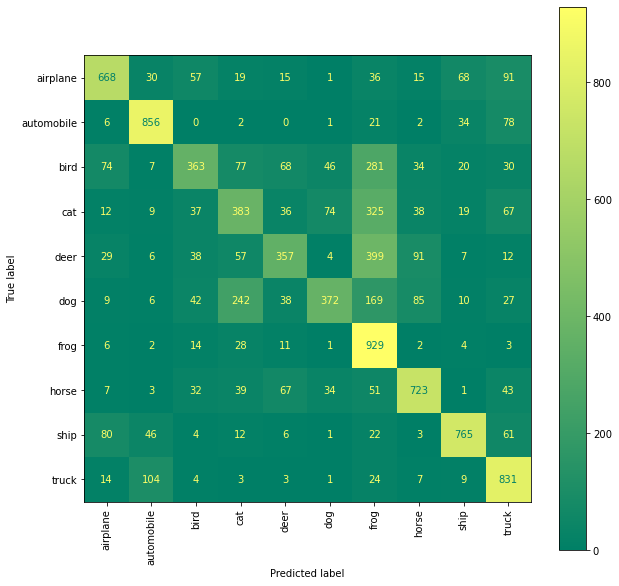

In [10]:
evaluation = model.evaluate(X_test, y_cat_test)
print(f'Test Accuracy : {evaluation[1] * 100:.2f}%')

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred)


disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)


fig, ax = plt.subplots(figsize=(10, 10))
disp = disp.plot(xticks_rotation='vertical', ax=ax,cmap='summer')

plt.show()

In [11]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.67      0.70      1000
           1       0.80      0.86      0.83      1000
           2       0.61      0.36      0.46      1000
           3       0.44      0.38      0.41      1000
           4       0.59      0.36      0.45      1000
           5       0.70      0.37      0.48      1000
           6       0.41      0.93      0.57      1000
           7       0.72      0.72      0.72      1000
           8       0.82      0.77      0.79      1000
           9       0.67      0.83      0.74      1000

    accuracy                           0.62     10000
   macro avg       0.65      0.62      0.62     10000
weighted avg       0.65      0.62      0.62     10000



### Testing

 Image: [0]
1/1 [==============================] - 0s 34ms/step
The model predict that image is airplane


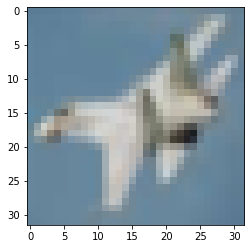

In [12]:
my_image = X_test[10]
plt.imshow(my_image)

print(f" Image: {y_test[10]}")
pred_100 = np.argmax(model.predict(my_image.reshape(1, 32, 32, 3)))
print(f"The model predict that image is {labels[pred_100]}")